# Библиотеки

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
from IPython.display import Image

In [3]:
import math

import numpy as np; np.random.seed(13)
import matplotlib.pyplot as plt

In [4]:
import statistics
import seaborn as sns
import statsmodels.api as sm

import statsmodels.formula.api as smf

from scipy import stats
from numpy import random

**Процесс машинного обучения :**
- вопрос
- подготовка данных +  feature engineering
- машинное обучение 
- валидация 

**Модель** - объект, который на вход получает некторую информацию про наш объект, а возвращает предскажанное значение: класс, значение среднего, кластер 

**Обучение** - подбор параметров, которые минизируют ошибку (любую другую метрику)

**Машинное обучение. основная задача** - приобрети генерализированные знания,которые можно обобщить на новые объекты 

<div class="alert alert-warning">
<h2> Пандас </h2>
</div>

In [5]:
# импортирует датасет о брилиантах
diamonds = pd.read_csv('data//diamonds.csv').sample(400).reset_index(drop = True)

In [6]:
# через iloc
diamonds.iloc[[2, 9], [1, 5]]

,carat,depth
2,1.02,61.1
9,0.77,62.9


In [7]:
# через iloc = integer location
diamonds.iloc[0:5,0:4]

,Unnamed: 0,carat,cut,color
0,11623,1.20,Ideal,I
1,53687,0.80,Very Good,E
2,6480,1.02,Premium,F
3,40392,0.53,Ideal,G
4,37664,0.42,Premium,F


In [8]:
# через loc
diamonds.loc[:, ['carat' ,'depth']]

,carat,depth
0,1.20,60.5
1,0.80,62.9
2,1.02,61.1
3,0.53,59.9
4,0.42,61.8
...,...,...
395,0.33,61.9
396,0.30,62.1
397,1.04,61.8
398,1.03,61.6


In [9]:
# певые 8 хотя пишу 7 
diamonds.loc[:7] #если индекс представляет собой последовательность чисел от 0 с шагом 1

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,11623,1.20,Ideal,I,SI2,60.5,58.0,5050,6.92,6.83,4.16
1,53687,0.80,Very Good,E,SI2,62.9,54.0,2715,5.91,6.02,3.75
2,6480,1.02,Premium,F,SI2,61.1,62.0,4057,6.54,6.49,3.98
3,40392,0.53,Ideal,G,SI2,59.9,57.0,1132,5.25,5.30,3.16
4,37664,0.42,Premium,F,SI1,61.8,58.0,992,4.84,4.81,2.98
5,16750,1.04,Very Good,G,VS1,63.1,57.0,6669,6.39,6.44,4.05
6,34751,0.41,Premium,H,SI1,62.0,59.0,876,4.80,4.78,2.97
7,37916,0.41,Ideal,F,VS1,61.9,57.0,1007,4.73,4.77,2.94


In [10]:
# певые 8 хотя пишу 7 
# diamonds.iloc[:7]
diamonds.iloc[0:7]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,11623,1.20,Ideal,I,SI2,60.5,58.0,5050,6.92,6.83,4.16
1,53687,0.80,Very Good,E,SI2,62.9,54.0,2715,5.91,6.02,3.75
2,6480,1.02,Premium,F,SI2,61.1,62.0,4057,6.54,6.49,3.98
3,40392,0.53,Ideal,G,SI2,59.9,57.0,1132,5.25,5.30,3.16
4,37664,0.42,Premium,F,SI1,61.8,58.0,992,4.84,4.81,2.98
5,16750,1.04,Very Good,G,VS1,63.1,57.0,6669,6.39,6.44,4.05
6,34751,0.41,Premium,H,SI1,62.0,59.0,876,4.80,4.78,2.97


In [11]:
# возвращает серию с числом колонок каждого из типов
diamonds.dtypes.value_counts()

float64    6
object     3
int64      2
dtype: int64

In [12]:
# возвращает часть датафрэйма, куда были включены колонки с типами, указанными в include, или исключены колонки с типами, указанными в exclude
diamonds.select_dtypes(include=['int64', 'float64' ], exclude=['object']).head(1)

,Unnamed: 0,carat,depth,table,price,x,y,z
0,11623,1.2,60.5,58.0,5050,6.92,6.83,4.16


In [13]:
# возвращает коллекцию с индексом всех строк
diamonds.index

RangeIndex(start=0, stop=400, step=1)

In [14]:
# фильтрация по нескольким условиям
diamonds[(diamonds['carat']>2) & (diamonds['depth']>2) ].head(2)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
21,25916,2.20,Premium,J,VS1,61.7,59.0,15064,8.30,8.34,5.13
46,27523,2.53,Premium,H,SI1,62.1,59.0,18254,8.83,8.73,5.45


In [15]:
titatnic = pd.read_csv('https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv')

In [16]:
titatnic.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [17]:
# быстро найти долю
norm_data = pd.DataFrame(titatnic[['lunch']].value_counts(normalize= True)).reset_index()
norm_data

,lunch,0
0,standard,0.645
1,free/reduced,0.355


In [32]:
data.describe()

,math score,reading score,writing score
count,355.000000,355.000000,355.000000
mean,58.921127,64.653521,63.022535
std,15.159956,14.895339,15.433823
min,0.000000,17.000000,10.000000
25%,49.000000,56.000000,53.000000
50%,60.000000,65.000000,64.000000
75%,69.000000,75.000000,74.000000
max,100.000000,100.000000,100.000000


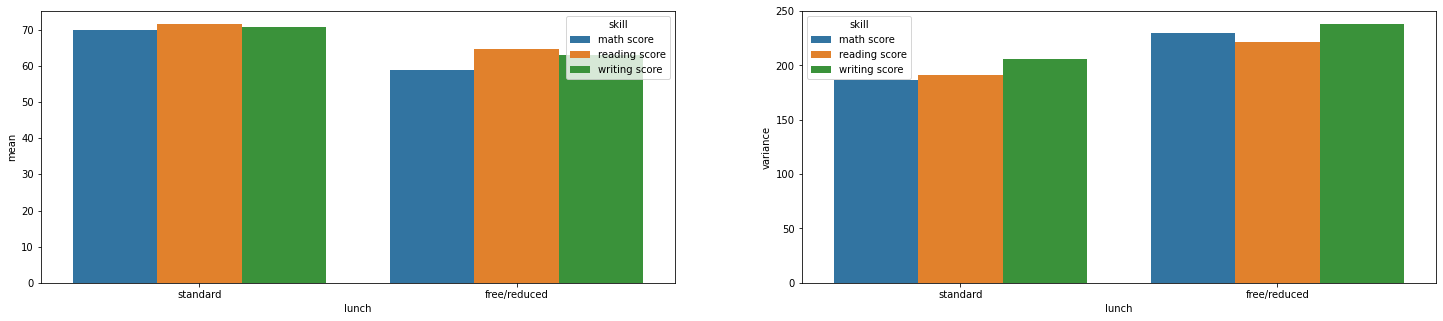

In [33]:
students = pd.read_csv('https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv')
box = []
for i in students['lunch'].unique():
    data = students.query('lunch == @i').iloc[0:, -3:]
    mean_ = data.describe().iloc[1]
    variance = data.describe().iloc[2]**2
    col = data.describe().columns
    for j in range(len(mean_)):
        box.append([i, col[j], mean_[j], variance[j] ])
df = pd.DataFrame(box, columns = ['lunch', 'skill', 'mean', 'variance' ])

f, axes = plt.subplots(1, 2, figsize=(25,5))
for i, col in enumerate(['mean', 'variance']):
    sns.barplot(x = 'lunch', y =col, hue ='skill', data =df , ax= axes[i])

In [19]:
# метод isin
students[students['parental level of education'].isin(["bachelor's degree", "master's degree"])].head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
2,female,group B,master's degree,standard,none,90,95,93


In [27]:
# фильтр
students.filter(like = 'score' , axis = 1).head()
#  Аргумент like отбирает те лэйблы, где встречается поданное значение
# Аргумент axis отвечает за то, какие лэйблы мы рассматриваем - индекс или колонки
# Аргумент regex отбирает лэйблы, подходящие к переданному паттерну
# Аргумент items отбирает лэйблы, переданные в коллекции в качестве значения
# Можно использовать только один из аргументов items, like, regex

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [48]:
students

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [37]:
# группировка без индекса сразу
students.groupby('gender' , as_index = False).agg({'math score':np.mean})

,gender,math score
0,female,63.633205
1,male,68.728216


In [53]:
# работа с мультииндексами
st = students.groupby(['gender', 'race/ethnicity'] , as_index = True).agg({'math score':np.mean, 'reading score':np.mean})
st.loc[[('female', 'group A'),
        ('female', 'group C') ]]

math score  reading score
gender race/ethnicity                           
female group A          58.527778      69.000000
       group C          62.033333      71.944444

In [66]:
# получить топ 5 математиков девуше и юношей
students.sort_values(['gender', 'math score'] , ascending = False) \
        .groupby(['gender']) \
        .head(1) \
        .reset_index(drop =True)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group E,associate's degree,free/reduced,completed,100,100,93
1,female,group E,some college,standard,none,100,92,97


In [81]:
# добавить сразу много столбцы
students= students.assign(total_score = students['math score'] + students['reading score'] + students['writing score'] ,
                         total_score_log = np.log(students['math score'] + students['reading score'] + students['writing score']))
students

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,total_score_log
0,female,group B,bachelor's degree,standard,none,72,72,74,218,5.384495
1,female,group C,some college,standard,completed,69,90,88,247,5.509388
2,female,group B,master's degree,standard,none,90,95,93,278,5.627621
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,4.997212
4,male,group C,some college,standard,none,76,78,75,229,5.433722
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,5.641907
996,male,group C,high school,free/reduced,none,62,55,55,172,5.147494
997,female,group C,high school,free/reduced,completed,59,71,65,195,5.273000
998,female,group D,some college,standard,completed,68,78,77,223,5.407172


In [88]:
# чтобы убрать индекс  Unnamed: 0
dota =pd.read_csv('https://stepik.org/media/attachments/course/4852/accountancy.csv', 
                  index_col=0)

In [102]:
# crosstab
pd.crosstab (dota['attack_type'], dota['primary_attr'])

primary_attr,agi,int,str
attack_type,,,
Melee,19,2,35
Ranged,18,40,3


In [108]:
concentrations = pd.read_csv('http://stepik.org/media/attachments/course/4852/algae.csv')
mean_concentrations = concentrations.groupby(['genus']).mean()
round(concentrations.query('genus == "Fucus"').describe(), 2)

,sucrose,alanin,citrate,glucose,oleic_acid
count,3.00,3.00,3.00,3.00,3.00
mean,4.36,3.57,4.21,2.81,3.37
std,2.11,3.15,2.69,0.71,3.05
min,3.00,0.35,1.22,2.27,0.30
25%,3.14,2.03,3.11,2.41,1.85
50%,3.28,3.71,5.00,2.55,3.39
75%,5.03,5.18,5.71,3.09,4.90
max,6.79,6.64,6.42,3.62,6.41


<div class="alert alert-warning">
<h2> Визуализация </h2>
</div>

In [116]:
students.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,total_score_log
0,female,group B,bachelor's degree,standard,none,72,72,74,218,5.384495
1,female,group C,some college,standard,completed,69,90,88,247,5.509388


<AxesSubplot:xlabel='math score', ylabel='reading score'>

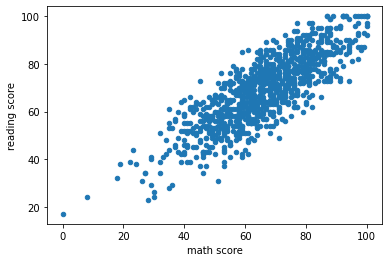

In [115]:
students.plot.scatter(x = 'math score', y = 'reading score')

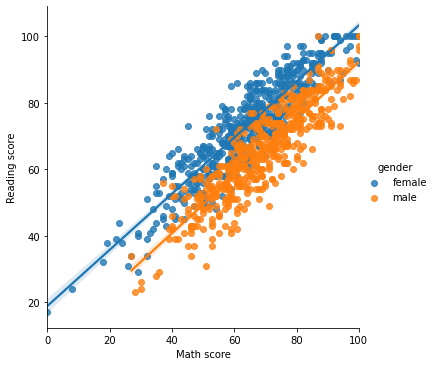

In [122]:
ax = sns.lmplot(x='math score', y='reading score', hue='gender', data=students, fit_reg = True)
ax.set_xlabels('Math score')
ax.set_ylabels('Reading score')

In [123]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/income.csv')

<AxesSubplot:>

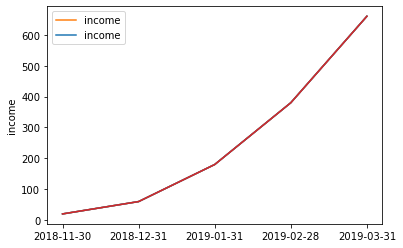

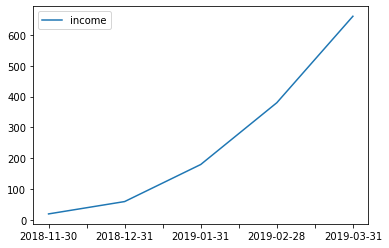

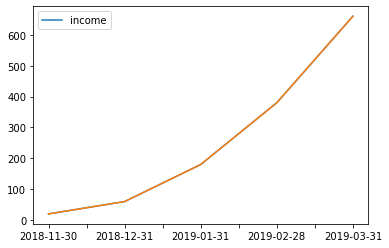

In [129]:
sns.lineplot(x=df.index, y=df.income)

df['income'].plot()

sns.lineplot(data=df)

plt.plot(df.index, df.income)

df.plot(kind='line')

df.plot()

df.income.plot()

In [151]:
df = pd.read_csv("https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv", sep=",", index_col=0)

,attack_type,id,legs,localized_name,name,primary_attr,roles


array([[<AxesSubplot:title={'center':'lenths'}>]], dtype=object)

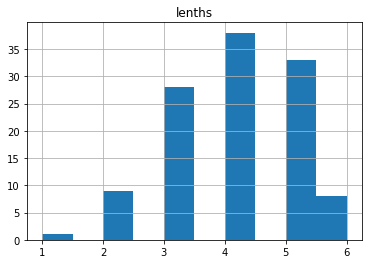

In [155]:
lenths = [len(r.split(',')) for r in df.roles]
df['lenths'] = lenths
df[['lenths']].hist()

In [201]:
df = pd.read_csv("https://stepik.org/media/attachments/course/4852/iris.csv", sep=",", index_col=0)

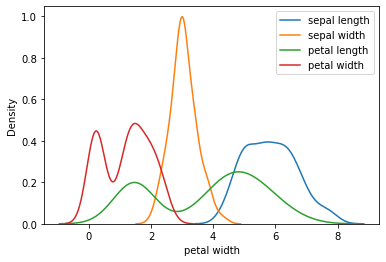

In [204]:
for name in df.filter(like='al').columns:
    sns.distplot(df[name], label=name, hist=False)
plt.legend()

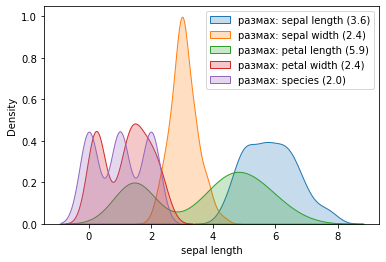

In [206]:
for column in df:
    sns.kdeplot(df[column], label=f'размах: {column} ({df[column].max() - df[column].min():.1f})', shade=True)
plt.legend()

In [232]:
1 if i not in [0, 1] else 0

1

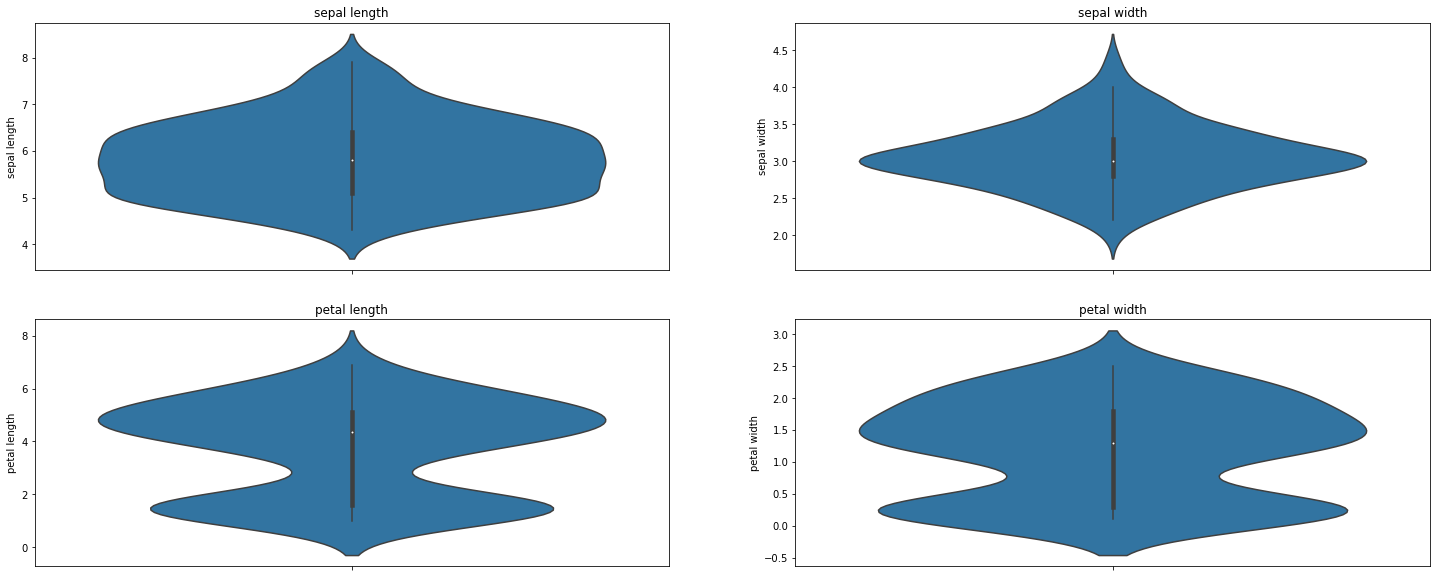

In [258]:
from itertools import product
order = [item for item in product([0, 1,], repeat=2)]


f, axes = plt.subplots(2, 2 , figsize = (25, 10))
for name , order in zip (df.columns, order):
    ax = axes[order[0], order[1]]
    sns.violinplot( y=name, data=df , ax =ax)
    ax.set_title(name)

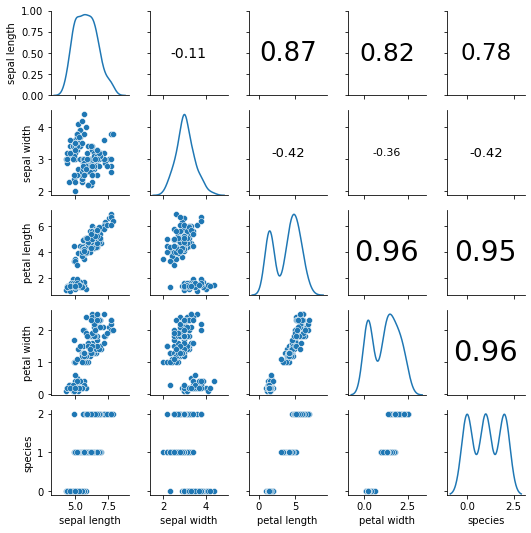

In [267]:

def corr(x, y, **kwargs):
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    # Add the label to the plot
    ax = plt.gca()
    if abs(coef) <= 0.25:
        fontsize = 14
    else:
        fontsize = round(30*abs(coef))
    ax.annotate(
        "%.2f" %coef, (0.5, 0.5), xycoords='axes fraction'
        , ha='center', va='center', fontsize=fontsize
    )
    

g = sns.PairGrid(df.loc[-2:], diag_sharey=False, height=1.5)
# g.map_upper(sns.scatterplot)
g.map_upper(corr)
g.map_lower(sns.scatterplot)
g.map_diag(sns.kdeplot)

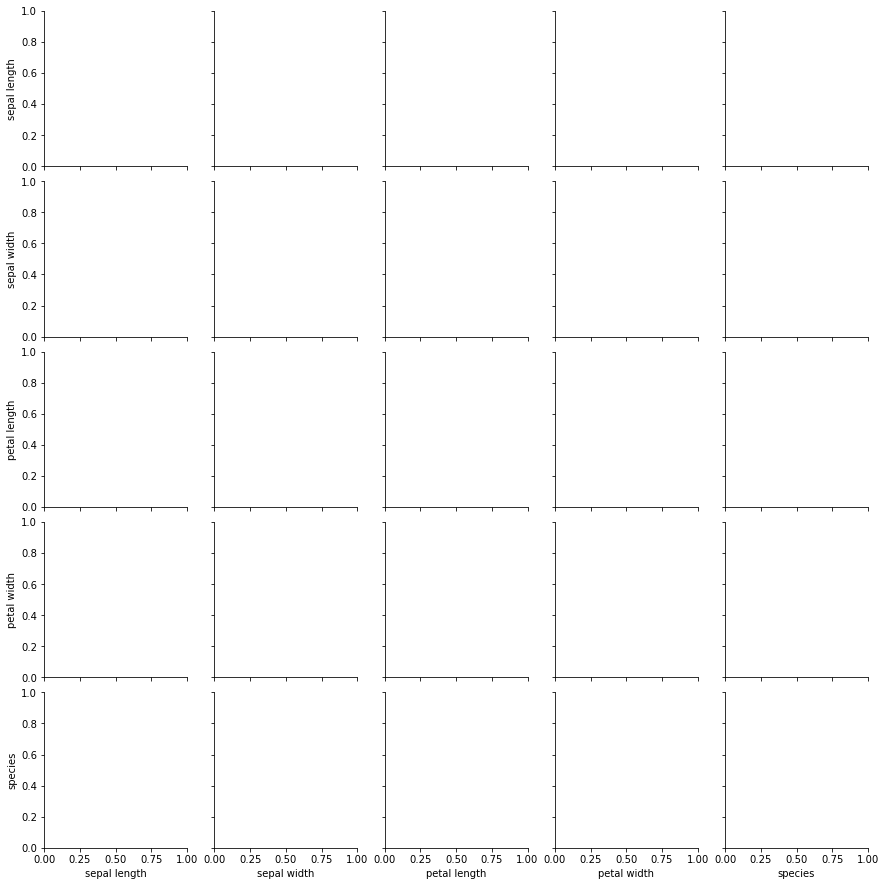

In [275]:
x = sns.PairGrid(df )#, diag_sharey=False, height=1.5 , hue = 'species')